# Reddit Scraping - Project 4
----
## Introduction

#### Scenario

You're fresh out of your Data Science bootcamp and looking to break through in the world of freelance data journalism. Nate Silver and co. at FiveThirtyEight have agreed to hear your pitch for a story in two weeks!

Your piece is going to be on how to create a Reddit post that will get the most engagement from Reddit users. Because this is FiveThirtyEight, you're going to have to get data and analyze it in order to make a compelling narrative.

## Getting Started

#### Start by importing some libraries that are neccessary for web scraping

In [2]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import time

#### Imported chromedriver, had to redownload the latest chromedriver and insert the file into the project file path because the current chrome browser wouldn't work with the earlier version of chromedriver.


In [3]:
driver = webdriver.Chrome(executable_path="./chromedriver")

#### Getting chromedriver to retrieve html from reddit, not sure what the timer is for exactly need to get info

In [4]:
driver.get("http://www.reddit.com")

# Give it a second to load the page

time.sleep(1)

#### Grabbing the page content and setting it to a html variable

In [5]:
html = driver.page_source

#### Use BeautifulSoup parser for our html

In [6]:
soup = BeautifulSoup(html, 'lxml')

#### Close our chrome driver

In [7]:
driver.close()

#### List comprehension for specifc reddit tags. Used xpath and beautifulsoup to search where important variables for our models are located. Removed the first element in some lists that were made because reddit's first post are advertisements that arent helpful for our model


In [8]:
# List comprehension for reddit titles

rtitle = [x.text for x in soup.find_all('a', {'data-event-action':'title'})]
rtitle.pop(0)

# List comprehension for subreddits of reddit posts

subreddit = [x.text for x in soup.find_all('a', {'class':'subreddit hover may-blank'})]

# List comprehension for reddit post timestamps

rtime = [x.text for x in soup.find_all('time', {'class':'live-timestamp'})]

# List comprehension for reddit total comments of post

comments = [x.text for x in soup.find_all('a', {'class':'bylink comments may-blank'})]

#### Tried to make a reddit web scraping function but failed. 

A large portion of the project time was spent building this reddit scraper. The scraper could pull posts off the page but the posts pulled were 90% duplicates (~18,000 to ~500 non-duplicates).


    def reddit_scraper(website):
    
    driver = webdriver.Chrome(executable_path="./chromedriver")
    driver.get(website)
    
    time.sleep(1)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
        
    titles = [x. text for x in soup.find_all('a', {'data-event-action':'title'})]
    titles.pop(0)    
    
    upvotes = [x.text for x in soup.find_all('div', {'class':'score unvoted'})]
    upvotes.pop(0)
    
    subreddit = [x.text for x in soup.find_all('a', {'class':'subreddit hover may-blank'})]
    
    rtime = [x.text for x in soup.find_all('time', {'class':'live-timestamp'})]
    
    comments = [x.text for x in soup.find_all('a', {'class':'bylink comments may-blank'})]
    
    dataframe = pd.DataFrame(
    {'titles': titles,
     'upvotes': upvotes,
     'subreddit': subreddit,
     'time_stamp': rtime,
     'num_comments': comments
    })
    
    ids=[]
        
    for x in soup.findAll('div', {'class': 'thing'}):
        ids.append(x['data-fullname'])
            
    max_results = 20001
    
    for i in range(25, max_results, 25):
        
        url_template = "http://www.reddit.com/?count={}&after={}".format(i, ids[-1])
        driver.get(url_template)
        
        time.sleep(1)
        
        html = driver.page_source
        soup = BeautifulSoup(html, 'lxml')
        
        # Additional titles added onto titles varaible 
        
        titles_2 = []
        
        for x in soup.find_all('a', {'data-event-action':'title'}):
            titles_2.append(x.text)
            
        titles_2.pop(0)
        
        # Additional upvote numbers added onto upvote varaible 
        
        upvotes_2 = []
        
        for x in soup.find_all('div', {'class':'score unvoted'}):
            upvotes_2.append(x.text)
            
        upvotes_2.pop(0)
        
        # Additional subreddit groups added onto subreddit varaible 
        
        subreddit_2 = []
        
        for x in soup.find_all('a', {'class':'subreddit hover may-blank'}):
            subreddit_2.append(x.text)
        
        # Additional time stamps added onto rtime varaible 
        
        rtime_2 = []
        
        for x in soup.find_all('time', {'class':'live-timestamp'}):
            rtime_2.append(x.text)
                                     
        # Additional comment numbers added onto comments varaible 
        
        comments_2 = []
        
        for x in soup.find_all('a', {'class':'bylink comments may-blank'}):
            comments_2.append(x.text)
  
        # Adding additional ids to id's variable allowing us to see the next page id
        
        for x in soup.findAll('div', {'class': 'thing'}):
            ids.append(x['data-fullname'])
    
        try:
            dataframe_1 = pd.DataFrame({'titles': titles_2,
                                  'upvotes': upvotes_2,
                                  'subreddit': subreddit_2,
                                  'time_stamp': rtime_2,
                                  'num_comments': comments_2
                                 })
            dataframe = pd.concat([dataframe, dataframe_1])
            
        except:
            pass       
               
        time.sleep(1)
    
    dataframe.reset_index(inplace = True)
    driver.close()
    return dataframe

#### Use Sophie's dataset to build my models.

In [9]:
df = pd.read_csv('./scraping_results.csv')

#### May add additional code to try and webscrape myself below


In [10]:
# Code for later

## EDA

#### Examining the dataset

In [11]:
df.head()

,Unnamed: 0,created_at,id,num_comments,subreddit,time_delta,time_now,title,upvotes
0,0,2018-01-22 16:36:35,470616764,1153,gifs,0 days 04:24:57.883078000,2018-01-22 21:01:32.883070,Finnish ski jumping team,86005
1,1,2018-01-22 16:37:28,470617063,238,pics,0 days 04:24:04.883093000,2018-01-22 21:01:32.883092,Super excited about motherhood,20336
2,2,2018-01-22 16:50:12,470621440,844,funny,0 days 04:11:20.883101000,2018-01-22 21:01:32.883100,Messing with the new guy.,17611
3,3,2018-01-22 17:25:20,470633617,380,space,0 days 03:36:12.883109000,2018-01-22 21:01:32.883108,NASA cancels and postpones all of their public...,11178
4,4,2018-01-22 15:41:56,470598246,430,technology,0 days 05:19:36.883120000,2018-01-22 21:01:32.883118,New Bill Would Stop States From Banning Broadb...,13467


In [12]:
df.shape

(5567, 9)

In [13]:
df.dtypes

Unnamed: 0       int64
created_at      object
id               int64
num_comments     int64
subreddit       object
time_delta      object
time_now        object
title           object
upvotes          int64
dtype: object

In [14]:
df.columns

Index([u'Unnamed: 0', u'created_at', u'id', u'num_comments', u'subreddit',
       u'time_delta', u'time_now', u'title', u'upvotes'],
      dtype='object')

#### Dropping the "Unnamed: 0" column

In [15]:
df = df.drop('Unnamed: 0', axis = 1)

#### Removing duplicate titles

In [16]:
df.drop_duplicates('title', inplace = True)

In [17]:
df.shape

(5405, 8)

#### Convert all number of comments 15 and below to 0 and all number of comments above 15 to 1

In [18]:
from sklearn.model_selection import train_test_split

In [77]:
np.mean(df.num_comments)

67.72802960222016

In [78]:
X = df.drop('num_comments', axis = 1)
y = df.num_comments

In [79]:
y = y.apply(lambda x: 0 if x <= 67 else 1)

In [80]:
X.head()

,created_at,id,subreddit,time_delta,time_now,title,upvotes
0,2018-01-22 16:36:35,470616764,gifs,0 days 04:24:57.883078000,2018-01-22 21:01:32.883070,Finnish ski jumping team,86005
1,2018-01-22 16:37:28,470617063,pics,0 days 04:24:04.883093000,2018-01-22 21:01:32.883092,Super excited about motherhood,20336
2,2018-01-22 16:50:12,470621440,funny,0 days 04:11:20.883101000,2018-01-22 21:01:32.883100,Messing with the new guy.,17611
3,2018-01-22 17:25:20,470633617,space,0 days 03:36:12.883109000,2018-01-22 21:01:32.883108,NASA cancels and postpones all of their public...,11178
4,2018-01-22 15:41:56,470598246,technology,0 days 05:19:36.883120000,2018-01-22 21:01:32.883118,New Bill Would Stop States From Banning Broadb...,13467


In [81]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: num_comments, dtype: int64

#### Graphing the total amounts of comments on a histogram

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/jack/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


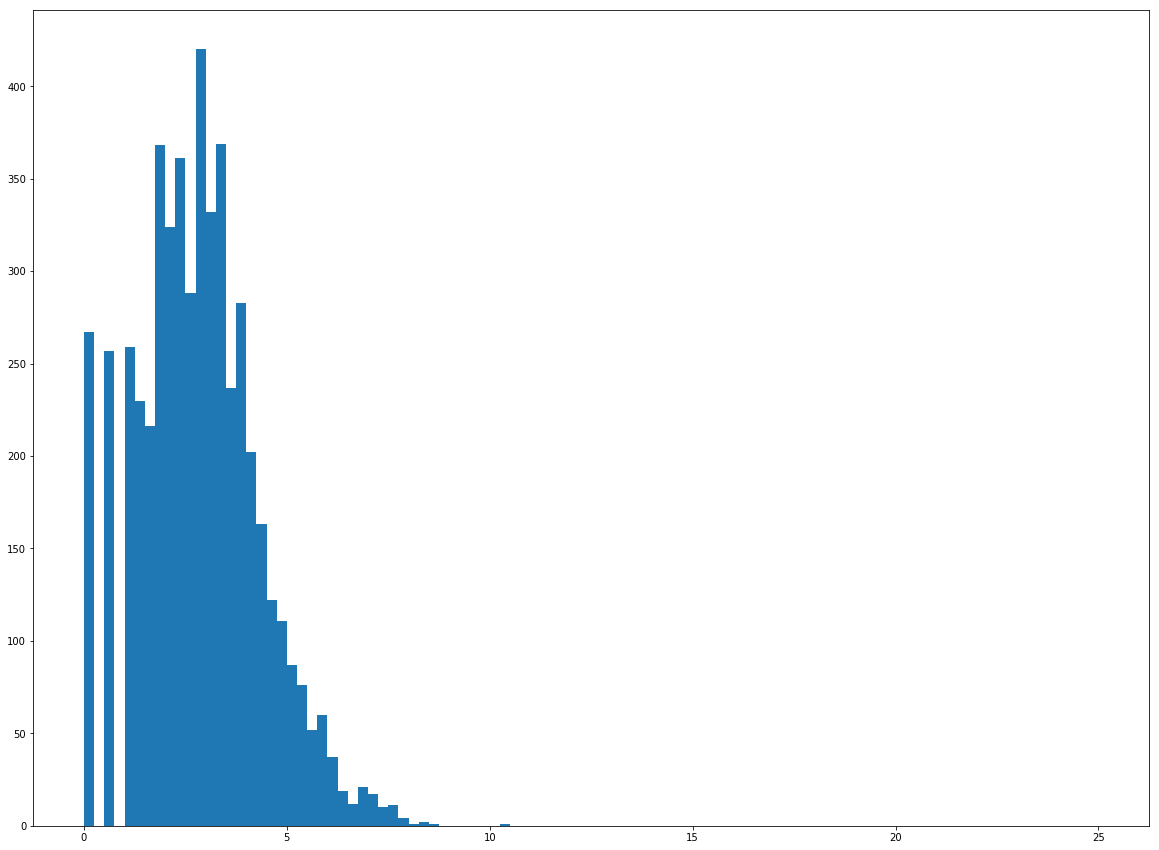

In [83]:
fig, ax = plt.subplots(figsize = (20,15))
plt.hist(np.log(df.num_comments),bins = 100,range = (0,25));

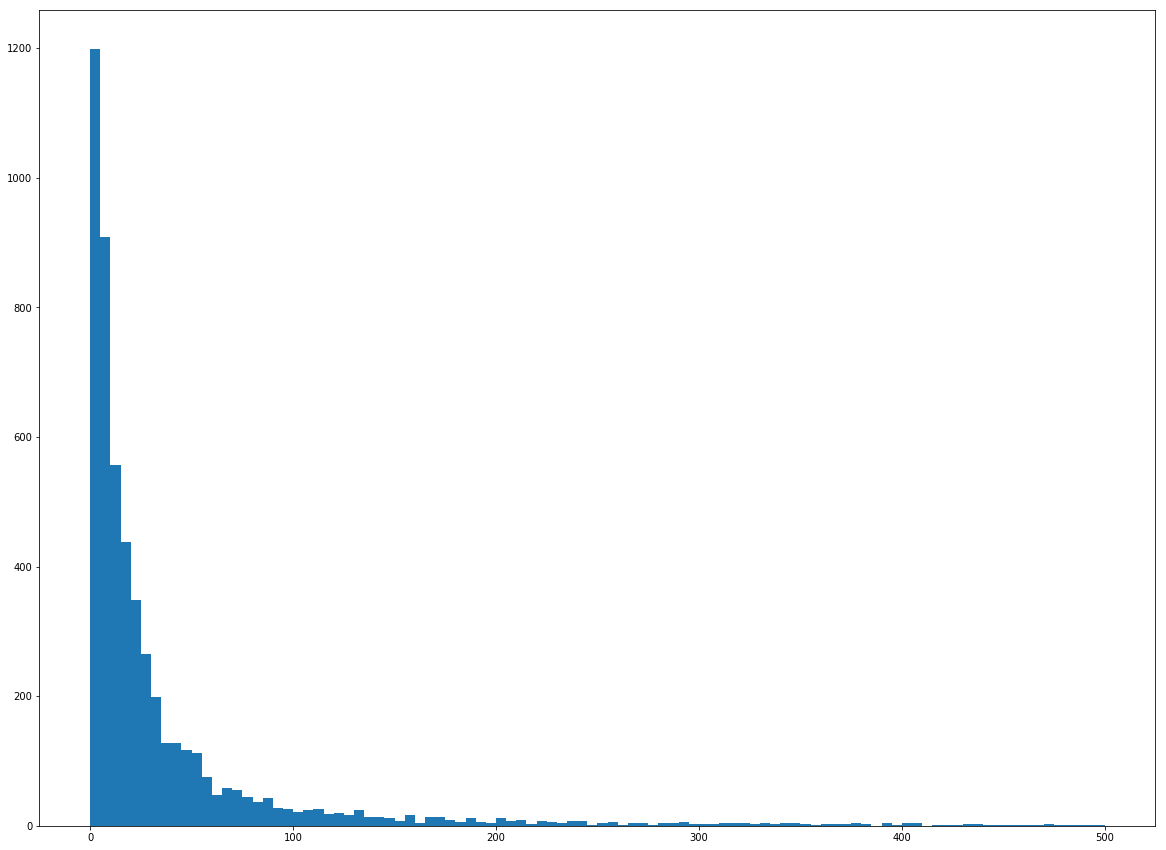

In [84]:
fig, ax = plt.subplots(figsize = (20,15))
plt.hist(df.num_comments, bins = 100, range = (0,500));

#### Creating a train test split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

## The Models

#### Baseline model accuracy for number of comments will be if we guessed the most frequent option, in this case it is 0

In [86]:
y.value_counts()

0    4557
1     848
Name: num_comments, dtype: int64

#### Baseline is ~51% for 15 or less comments on a single post

In [87]:
y.value_counts().values[0]/float(len(y))

0.84310823311748384

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [37]:
cv = StratifiedKFold(n_splits = 10, random_state = 100)

## Reddit Titles
#### Count Vectorizer for feature extracting the titles

In [38]:
cvec = CountVectorizer(ngram_range = (1,4), lowercase = True, 
                       stop_words = 'english', max_features = 10000)

#### Fit and transforming our train titles 

In [39]:
X_train_dtm = pd.DataFrame(cvec.fit_transform(X_train.title).todense(), columns=cvec.get_feature_names())

#### Only transforming our train titles 

In [40]:
X_test_dtm = pd.DataFrame(cvec.transform(X_test.title).todense(), columns=cvec.get_feature_names())

In [41]:
X_test_dtm.head()

,00,000,000 year,01,10,10 year,10 years,10 years ago,10 years ago today,100,...,youtube channel,youtube video,ypg,yuri,zealand,zelda,zero,zone,zu,zum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Counting the most common words

In [42]:
from collections import Counter

In [43]:
cvec.build_analyzer()

<function sklearn.feature_extraction.text.<lambda>>

In [44]:
summaries = "".join(df.title)
ngrams_summaries = cvec.build_analyzer()(summaries)

Counter(ngrams_summaries).most_common(10)

[(u'new', 149),
 (u'just', 142),
 (u'time', 115),
 (u'like', 101),
 (u'game', 76),
 (u'people', 73),
 (u'oc', 72),
 (u'today', 71),
 (u'got', 71),
 (u'year', 69)]

#### Multinomial Naive Base Model Classifier

In [45]:
mnnb = MultinomialNB()
mnnb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
mnnb.score(X_test_dtm, y_test)

0.8452914798206278

In [47]:
mnnb.feature_log_prob_.shape

(2, 10000)

In [48]:
pd.DataFrame(mnnb.feature_log_prob_, columns = cvec.get_feature_names())

,00,000,000 year,01,10,10 year,10 years,10 years ago,10 years ago today,100,...,youtube channel,youtube video,ypg,yuri,zealand,zelda,zero,zone,zu,zum
0,-9.181769,-7.447168,-9.181769,-9.181769,-7.235859,-9.181769,-8.670944,-9.181769,-9.587235,-7.882486,...,-8.894087,-9.181769,-8.670944,-8.488622,-8.670944,-8.670944,-8.334472,-9.587235,-8.894087,-9.181769
1,-8.825854,-8.132706,-9.519001,-9.519001,-7.573091,-9.519001,-8.420389,-8.420389,-8.825854,-7.727241,...,-9.519001,-9.519001,-8.825854,-9.519001,-9.519001,-9.519001,-9.519001,-8.825854,-8.420389,-9.519001


In [49]:
for x,y in zip(X_train_dtm.columns, mnnb.feature_log_prob_):
    print x,y

00 [-9.18176941 -7.44716836 -9.18176941 ..., -9.58723452 -8.89408734
 -9.18176941]
000 [-8.82585367 -8.13270649 -9.51900085 ..., -8.82585367 -8.42038856
 -9.51900085]


#### Logistic Regression Classifer

In [50]:
lr = LogisticRegression()

In [51]:
score = cross_val_score(lr, X_test_dtm, y_test, cv = cv, verbose = 1)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished


In [52]:
print 'mean: {} std: +/- {}'.format(np.mean(score), np.std(score))

mean: 0.847001777085 std: +/- 0.0108137592273


#### Making a pipeline for our models

In [53]:
from sklearn.pipeline import Pipeline

#### Pipeline for titles 

In [54]:
def cv_title_model(vectorizer, model):
    my_pipe = Pipeline([('vectorizer', vectorizer),
                        ('model', model)])
    results = cross_val_score(my_pipe, X_train.title, y_train, cv = cv, n_jobs = -1, verbose = 1)
    my_pipe.fit(X_train.title, y_train)
    
    print "Number of features: ", len(my_pipe.named_steps['vectorizer'].get_feature_names())
    print "Train Set Accuracy {:.4f}".format(my_pipe.score(X_train.title, y_train))
    print "Stratified KFold Cross Val Accuracy {:.4f} +/- {:.4f}".format(results.mean(), results.std())
    print "TestSet Accuracy: {:.4f}".format(my_pipe.score(X_test.title, y_test))

#### Multiple tests on different count vectorizers using Multinomial Naive Base

In [55]:
cvec_1 = CountVectorizer(ngram_range = (1,2), lowercase = True, stop_words = 'english')
cvec_2 = CountVectorizer(ngram_range = (2,4), lowercase = True, stop_words = 'english')
cvec_3 = CountVectorizer(ngram_range = (3,4), lowercase = True, stop_words = 'english', max_features = 5000)
cvec_4 = CountVectorizer(ngram_range = (4,5), lowercase = True, stop_words = 'english', max_features = 5000)


In [56]:
# cvec_1 top 10 words
summaries = "".join(df.title)
ngrams_summaries = cvec_1.build_analyzer()(summaries)
Counter(ngrams_summaries).most_common(10)

[(u'new', 149),
 (u'just', 142),
 (u'time', 115),
 (u'like', 101),
 (u'game', 76),
 (u'people', 73),
 (u'oc', 72),
 (u'today', 71),
 (u'got', 71),
 (u'year', 69)]

In [57]:
# cvec_2 top 10 words
ngrams_summaries = cvec_2.build_analyzer()(summaries)
Counter(ngrams_summaries).most_common(10)

[(u'super bowl', 20),
 (u'years ago', 17),
 (u'year old', 16),
 (u'looks like', 13),
 (u'alexis sanchez', 12),
 (u'fuck sony', 10),
 (u'manchester united', 9),
 (u'government shutdown', 8),
 (u'fuck sony fuck', 8),
 (u'sony fuck sony', 8)]

In [58]:
# cvec_3 top 10 words
ngrams_summaries = cvec_3.build_analyzer()(summaries)
Counter(ngrams_summaries).most_common(10)

[(u'fuck sony fuck', 8),
 (u'sony fuck sony', 8),
 (u'fuck sony fuck sony', 8),
 (u'sony fuck sony fuck', 7),
 (u'years ago today', 6),
 (u'thought guys like', 3),
 (u'world richest 82', 3),
 (u'world richest 82 wealth', 3),
 (u'tripadvisor fake restaurant', 3),
 (u'nfc championship game', 3)]

In [59]:
# cvec_4 top 10 words
ngrams_summaries = cvec_4.build_analyzer()(summaries)
Counter(ngrams_summaries).most_common(10)

[(u'fuck sony fuck sony', 8),
 (u'fuck sony fuck sony fuck', 7),
 (u'sony fuck sony fuck sony', 7),
 (u'sony fuck sony fuck', 7),
 (u'world richest 82 wealth', 3),
 (u'escorted marshals attend white school', 2),
 (u'orange county ready clear', 2),
 (u'white school 1960 african', 2),
 (u'new orleans school desegregation crisis', 2),
 (u'accent imitate india prime', 2)]

In [60]:
# cvec_1 multinomial model score
cv_title_model(cvec_1, mnnb)

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Number of features:  25757
Train Set Accuracy 0.9798
Stratified KFold Cross Val Accuracy 0.8558 +/- 0.0076
TestSet Accuracy: 0.8470


In [61]:
# cvec_2 multinomial model score
cv_title_model(cvec_2, mnnb)

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished


Number of features:  41550
Train Set Accuracy 0.9782
Stratified KFold Cross Val Accuracy 0.8616 +/- 0.0053
TestSet Accuracy: 0.8492


In [62]:
# cvec_3 multinomial model score
cv_title_model(cvec_3, mnnb)

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Number of features:  5000
Train Set Accuracy 0.9127
Stratified KFold Cross Val Accuracy 0.8622 +/- 0.0024
TestSet Accuracy: 0.8515


In [63]:
# cvec_4 multinomial model score
cv_title_model(cvec_4, mnnb)

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Number of features:  5000
Train Set Accuracy 0.9078
Stratified KFold Cross Val Accuracy 0.8627 +/- 0.0022
TestSet Accuracy: 0.8515


#### Multiple tests on different count vectorizers using Logistic Regression

In [64]:
# cvec_1 logistic regression model score
cv_title_model(cvec_1, lr)

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished


Number of features:  25757
Train Set Accuracy 0.9688
Stratified KFold Cross Val Accuracy 0.8592 +/- 0.0052
TestSet Accuracy: 0.8487


In [65]:
# cvec_2 logistic regression model score
cv_title_model(cvec_2, lr)

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished


Number of features:  41550
Train Set Accuracy 0.9644
Stratified KFold Cross Val Accuracy 0.8614 +/- 0.0032
TestSet Accuracy: 0.8503


In [66]:
# cvec_3 logistic regression model score
cv_title_model(cvec_3, lr)

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished


Number of features:  5000
Train Set Accuracy 0.8865
Stratified KFold Cross Val Accuracy 0.8633 +/- 0.0016
TestSet Accuracy: 0.8515


In [67]:
# cvec_4 logistic regression model score
cv_title_model(cvec_4, lr)

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


Number of features:  5000
Train Set Accuracy 0.8857
Stratified KFold Cross Val Accuracy 0.8633 +/- 0.0016
TestSet Accuracy: 0.8515


## Reddit Subreddits

#### Dummy subreddit

In [68]:
Xs = pd.get_dummies(df.subreddit, drop_first = True)

In [69]:
Xs.sum().sort_values(ascending = False).head(10)

DDLC                    90
aww                     87
funny                   84
eagles                  76
reddevils               75
todayilearned           50
Patriots                48
PewdiepieSubmissions    47
PrequelMemes            43
memes                   42
dtype: int64

#### Random Tree Classifier

In [70]:
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1, n_estimators=50)

In [71]:
score = cross_val_score(rf, Xs, y, cv = cv, verbose = 1)

ValueError: Found input variables with inconsistent numbers of samples: [5405, 10000]

In [72]:
np.mean(score)

0.84700177708458124

#### Logistic Regression Classifier

In [73]:
score = cross_val_score(lr, Xs, y, cv = cv, verbose = 1)

ValueError: Found input variables with inconsistent numbers of samples: [5405, 10000]

In [74]:
np.mean(score)

0.84700177708458124

#### Multinomial NB

In [75]:
score = cross_val_score(mnnb, Xs, y, cv = cv, verbose = 1)

ValueError: Found input variables with inconsistent numbers of samples: [5405, 10000]

In [76]:
np.mean(score)

0.84700177708458124

## Findings and Conclusion

* Baseline for our model is __~51%__

__Models on reddit titles__

* Multinomial NB Model using count vectorizer on reddit titles best score found was __~57%__
* Logistic Regression using count vectorizer on reddit titles best score found was __~58%__

__Most common words from best model__

1. 'new', 149 times
2. 'just', 142 times
3. 'time', 115 times
4. 'like', 101 times
5. 'game', 76 times
6. 'people', 73 times
7. 'oc', 72 times
8. 'today', 71 times
9. 'got', 71 times
10. 'year', 69 times

__Models on reddit subreddits__

* Random Forest Classifier on dummied reddit subreddit best score found was __~64%__
* Logistic Regression on dummied reddit subreddit best score found was __~64%__
* Multinomial NB on dummied reddit subreddit best score found was __~64%__

__Most common subreddits__

1. DDLC, 90 times
2. aww, 87 times
3. funny, 84 times
4. eagles, 76 times
5. reddevils, 75 times
6. todayilearned, 50 times
7. Patriots, 48 times
8. PewdiepieSubmissions, 47 times
9. PrequelMemes, 43 times
10. memes, 42 times



## Executive Summary

### Intro to Reddit

Ranking at the top 10 visited websites (Alexa Rankings), Reddit is an unbelievable source of enterainment, news, and information scaling across all industries. Users can post information through videos and images that can then be viewed and commented on by others. With 1.6 billions visiters a month, reddit is a powerhouse when it comes to attention. Through sheer user volumn alone, reddit posts can easily garner millions of views. But with a high user base coupled with posters always seeking the most attention, what can we do to make our post views higher than everyone else?

### Purpose and Scope of Work

To tackle the problem getting our posts views above the rest, we first need to gather data about past reddit posts. Luckily, reddit allows users to scrape their website as long as their criteria is upheld. The particular important pieces of information that we are try to scrape are the titles of posts, the subreddit of posts, the number of comments, the number of upvotes, and the date of posts. Getting the most information is going to be helpful for building our models in the future but with additional information comes additional EDA. Additional EDA was done to change integer values in columns from the string form to integer. 

The primary focus for this particular project was to classify our reddit posts based on the number of comments on each post. To simply our target which was our number of posts, I took the median of the comments which came out to be 15 and replaced any comments 15 and below with the value __0__ and number of comments above 15 were replaced with __1__. Through this classfication, we now have a basic "model" based on probability with a baseline of __~51%__. The two major features used to make our predictive models were reddit titles and the subreddits. I began my models using reddit titles.

Using sklearn's count vectorizer, I turned reddit titles to new features for our model. Using __Multinomial Naive Base__ and __Logistic Regression__ as my predictive models, the best scores from these models were __~57%__ and __~58%__ respectively. With a slight improvement from our baseline model, titles with words such as __'new', 'time', 'game' and 'oc'__ were some of the most predictive words.

Using subreddits instead, I could dummy the data to do our feature extraction. Using __Random Forrest Classifier__, __Logistic Regression__ and __Multinomial Naive Base__ as my predictive models, the best scores from these models were __~64%__, __~64%__ and __~64%__ respectively. The models were slightly better then the models using titles as features with subreddits __'DDLC', 'aww', 'funny', and 'eagles'__ being the most predictive subreddits. 

### Takeaway

Using both the title and subreddit features in our models, we were able to slightly beat our baseline model. We were able to find the most predictive words and subreddits __but they only tell us its predictive power__. It doesnt tell us what words/ subreddits determine higher comment thresholds. For this, we would need to look into the top words and view the effects on our target (aka number of comments). After viewing which words predict higher comments, we can suggest those words in the titles of posts to possibly improve comment count and post in certain subreddits to improve comment count. Additionally, we can webscrape post content for additional features, make models on the upvotes, and make models on the date/time. 

#### Extra

#### Find the words that are most common/ predictive by subsetting dataframe to only classfication of 1

#### Feature importance